.. meta::
   :description: An implementation of Multi Objective Cuckoo Search for Design Optimization (Yang and Deb, 2011) based on XS Yang implementation in Matlab on mathworks.com . In the original paper the survival mechanism is not specified, however NSGA2's Non-dominated Sorting and Crowding Distance sorting is used in the mathworks implementation.

.. meta::
   :keywords: Multi Objective CS, NSGA2, NSGA-II, Non-Dominated Sorting, Multi-objective Optimization, Python

# Multi Objective Cuckoo Search

An implementation of Multi Objective Cuckoo Search for Design Optimization (Yang and Deb, 2011) based on XS Yang implementation in Matlab on mathworks.com . In the original paper the survival mechanism is not specified, however NSGA2's Non-dominated Sorting and Crowding Distance sorting is used in the mathworks implementation. 

Apart from that, the implementation is almost similar to the single objective Cuckoo Search. The different is that the best solution in MOCS in this implementation is random solution from the current Pareto Front in the population. In the mathworks implementation the best is simply the first solution in the population.

### Example Standard

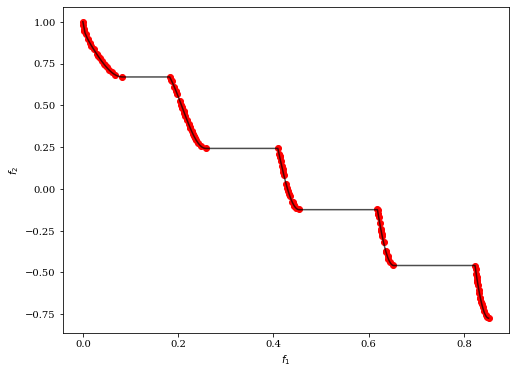

In [77]:
from pymoo.algorithms.mocs import MOCS
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt3")

algorithm = MOCS()

res = minimize(problem, algorithm, ('n_gen', 500), seed=1, verbose=False)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()

### Example Use NSGA-3 Perpendicular Distance Sorting

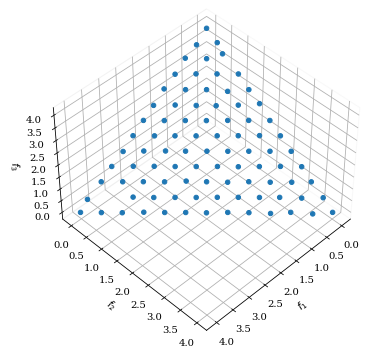

In [89]:
from pymoo.algorithms.nsga3 import ReferenceDirectionSurvival
from pymoo.algorithms.mocs import MOCS
from pymoo.factory import get_problem, get_reference_directions
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("dtlz1")
n_obj = 3
# create the reference directions to be used for the optimization
ref_generating_method = "das-dennis"
ref_dirs = get_reference_directions(ref_generating_method, n_obj, n_partitions=12)
reference_survival = ReferenceDirectionSurvival(ref_dirs)

algorithm = MOCS(survival=reference_survival, pop_size=90)

res = minimize(problem, algorithm, ('n_gen', 600), seed=1, verbose=False)
if n_obj == 2:
    plot = Scatter()
    plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
    plot.add(res.F, color="red")
    plot.show()
else:
    plot = Scatter().add(res.F)
    plot.show()

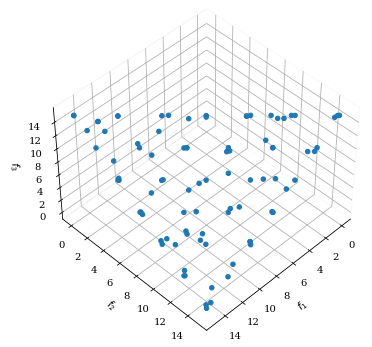

In [100]:
algorithm = MOCS(survival=reference_survival, pop_size=90)
res = minimize(get_problem("dtlz1^-1"),
               algorithm,
               seed=1,
               termination=('n_gen', 600))

Scatter().add(res.F).show()

### API